In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
filename = 'data/bq-results-20211105-102236-1pg8as4q8dgo.csv'
df = pd.read_csv(filename, dtype={"ping_average_latency": float, 
                                  "iperf_throughput_1_thread": float,
                                  "iperf_throughput_32_thread": float})

################# Data prep #################
df[['vm_1_gce_network_tier',
    'vm_2_gce_network_tier']] = df[['vm_1_gce_network_tier',
                                    'vm_2_gce_network_tier']].fillna(value='premium')
df[['tcp_max_receive_buffer']] = df[['tcp_max_receive_buffer']].fillna(value=6291456)
# df = df.set_index('thedate')
# query = 'vm_1_machine_type == "n1-standard-16" and ip_type == "internal" and vm_1_gce_network_tier == "premium"'
# df = df.query(query)
df = df[df['iperf_throughput_1_thread'].notnull()]
df = df[df['ping_average_latency'].notnull()]
df = df[df['sending_zone'].notnull()]
df = df[df['receiving_zone'].notnull()]
# df = df[df['vm_1_cloud'].notnull()]
# df = df[df['vm_2_cloud'].notnull()]
df[['pandas_datetime']] = pd.to_datetime(df.thedate)

/home/derek/projects/ml/tf_2.4_src/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,14,20,45,58,59,82,83,84) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df.sort_values(by=['iperf_timestamp', 'run_uri'], inplace=True, ascending=True)

In [4]:
df = df.set_index('thedate')

In [10]:
df.vm_1_machine_type

thedate
2019-04-29 16:52:38.241408 UTC     n1-standard-2
2019-04-29 16:52:39.188728 UTC     n1-standard-2
2019-04-29 16:54:20.89529 UTC      n1-standard-2
2019-04-29 16:54:21.922115 UTC     n1-standard-2
2019-04-29 16:56:00.948069 UTC     n1-standard-2
                                       ...      
2021-11-05 06:21:04.312259 UTC    n1-standard-16
2021-11-05 06:21:06.571779 UTC    n1-standard-16
2021-11-05 06:21:12.985052 UTC    n1-standard-16
2021-11-05 06:21:26.797958 UTC    n1-standard-16
2021-11-05 06:21:28.771427 UTC    n1-standard-16
Name: vm_1_machine_type, Length: 447292, dtype: object

In [5]:
one_hot_machine_type = pd.get_dummies(df['vm_1_machine_type'], dtype='float')
df = df.join(one_hot_machine_type)
one_hot_ip_type = pd.get_dummies(df['ip_type'], dtype='float')
df = df.join(one_hot_ip_type)

In [6]:
# trim vm_1_os_info field
df['vm_1_os_info_trunc'] = df['vm_1_os_info'].str.extract(r'(\w+\s+\d+.\d+).\d+\s+\w+')

In [7]:
one_hot_congestion_control = pd.get_dummies(df['tcp_congestion_control'], dtype='float')
df = df.join(one_hot_congestion_control)
one_hot_vm_1_os_info_trunc = pd.get_dummies(df['vm_1_os_info_trunc'], dtype='float')
df = df.join(one_hot_vm_1_os_info_trunc)

In [8]:
one_hot_congestion_control

,bbr,cubic
thedate,,
2019-04-29 16:52:38.241408 UTC,0.0,1.0
2019-04-29 16:52:39.188728 UTC,0.0,1.0
2019-04-29 16:54:20.89529 UTC,0.0,1.0
2019-04-29 16:54:21.922115 UTC,0.0,1.0
2019-04-29 16:56:00.948069 UTC,0.0,1.0
...,...,...
2021-11-05 06:21:04.312259 UTC,1.0,0.0
2021-11-05 06:21:06.571779 UTC,1.0,0.0
2021-11-05 06:21:12.985052 UTC,1.0,0.0


In [9]:
one_hot_vm_1_os_info_trunc

,Ubuntu 14.04,Ubuntu 16.04,Ubuntu 18.04,Ubuntu 20.04
thedate,,,,
2019-04-29 16:52:38.241408 UTC,1.0,0.0,0.0,0.0
2019-04-29 16:52:39.188728 UTC,1.0,0.0,0.0,0.0
2019-04-29 16:54:20.89529 UTC,1.0,0.0,0.0,0.0
2019-04-29 16:54:21.922115 UTC,1.0,0.0,0.0,0.0
2019-04-29 16:56:00.948069 UTC,1.0,0.0,0.0,0.0
...,...,...,...,...
2021-11-05 06:21:04.312259 UTC,0.0,0.0,1.0,0.0
2021-11-05 06:21:06.571779 UTC,0.0,0.0,1.0,0.0
2021-11-05 06:21:12.985052 UTC,0.0,0.0,1.0,0.0


In [10]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 20)
df.head()
# df[df.run_uri == 'cd2f3786-76a37a69-2dfd-4f89-adf5-5511e9c5576c']

,run_uri,vm_1_cloud,vm_2_cloud,sending_zone,receiving_zone,vm_1_machine_type,vm_2_machine_type,ip_type,vm_1_gce_network_tier,vm_2_gce_network_tier,ping_unit,vm_1_kernel_release,vm_2_kernel_release,rmem_max,tcp_congestion_control,tcp_max_receive_buffer,tcp_max_send_buffer,vm_1_wmem_max,ping_interval_time_us,ping_transaction_count,ping_timestamp,ping_max_latency,ping_min_latency,ping_average_latency,ping_latency_std_dev,sending_machine_type,receiving_machine_type,timestamp,TCP_RR_Latency_p90,TCP_RR_Latency_p99,TCP_RR_Latency_p50,TCP_RR_Latency_stddev,TCP_RR_Latency_mean,TCP_RR_Transaction_Rate,TCP_RR_Latency_Histogram,TCP_RR_Latency_max,TCP_RR_Latency_min,UDP_RR_Latency_max,UDP_RR_Latency_p90,UDP_RR_Latency_min,UDP_RR_Latency_mean,UDP_RR_Latency_p50,UDP_RR_Latency_p99,UDP_RR_Latency_stddev,UDP_RR_Latency_Histogram,TCP_STREAM_Throughput_total_1_thread,TCP_STREAM_Throughput_total_4_threads,TCP_STREAM_Throughput_total_32_threads,TCP_STREAM_Throughput_average_4_threads,TCP_STREAM_Throughput_average_32_threads,TCP_STREAM_Throughput_stddev_4_threads,TCP_STREAM_Throughput_stddev_32_threads,iperf_unit,date_time,iperf_timestamp,vm_1_os_info,vm_2_os_info,vm_1_os_type,vm_2_os_type,iperf_throughput_1_thread,iperf_throughput_4_threads,iperf_throughput_5_threads,iperf_throughput_32_threads,iperf_netpwr_1_thread,iperf_netpwr_4_threads,iperf_netpwr_32_threads,iperf_cwnd_1_thread,iperf_cwnd_4_threads,iperf_cwnd_32_threads,iperf_err_1_thread,iperf_err_4_threads,iperf_err_32_threads,iperf_write_1_thread,iperf_write_4_threads,iperf_write_32_threads,iperf_retry_1_thread,iperf_retry_4_threads,iperf_retry_32_threads,ipert_rtt_1_thread,ipert_rtt_4_threads,ipert_rtt_32_threads,ipert_rtt_unit_1_thread,ipert_rtt_unit_4_threads,ipert_rtt_unit_32_threads,iperf_reported_buffer_size_1_thread,iperf_reported_buffer_size_4_threads,iperf_reported_buffer_size_32_threads,pandas_datetime,n1-standard-16,n1-standard-2,external,internal,vm_1_os_info_trunc,bbr,cubic,Ubuntu 14.04,Ubuntu 16.04,Ubuntu 18.04,Ubuntu 20.04
thedate,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-04-29 16:52:38.241408 UTC,b5399e57-e5a13df1-e8fa-43c4-a1be-c242f17231b2,GCP,GCP,us-west1-b,asia-northeast1-a,n1-standard-2,n1-standard-2,internal,premium,premium,ms,4.4.0-146-generic,4.4.0-146-generic,NaN,cubic,6291456.0,NaN,NaN,NaN,NaN,1.556557e+09,94.122,88.240,88.456,0.688,n1-standard-2,n1-standard-2,1.556558e+09,88700.0,88900.0,88400.0,3387.093859,NaN,NaN,"{""176000.0"": 3, ""88200.0"": 406, ""91500.0"": 1, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1057.09,NaN,264.2725,NaN,2.346719,NaN,Mbits/sec,2019-04-29 16:59:43.833609 UTC,1.556557e+09,Ubuntu 14.04.6 LTS,Ubuntu 14.04.6 LTS,NaN,NaN,246.0,NaN,NaN,3817.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-04-29 16:52:38.241408+00:00,0.0,1.0,0.0,1.0,Ubuntu 14.04,0.0,1.0,1.0,0.0,0.0,0.0
2019-04-29 16:52:39.188728 UTC,b5399e57-176b99d1-027d-4b53-91c5-09ddf791e148,GCP,GCP,us-west1-b,asia-northeast1-a,n1-standard-2,n1-standard-2,internal,standard,standard,ms,4.4.0-146-generic,4.4.0-146-generic,NaN,cubic,6291456.0,NaN,NaN,NaN,NaN,1.556557e+09,88.520,88.274,88.374,0.143,n1-standard-2,n1-standard-2,1.556558e+09,88600.0,88800.0,88500.0,3388.226436,NaN,NaN,"{""88800.0"": 12, ""92000.0"": 1, ""176000.0"": 1, ""...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1078.84,NaN,269.7100,NaN,4.860775,NaN,Mbits/sec,2019-04-29 16:59:44.681262 UTC,1.556557e+09,Ubuntu 14.04.6 LTS,Ubuntu 14.04.6 LTS,NaN,NaN,276.0,NaN,NaN,3836.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-04-29 16:52:39.188728+00:00,0.0,1.0,0.0,1.0,Ubuntu 14.04,0.0,1.0,1.0,0.0,0.0,0.0
2019-04-29 16:54:20.89529 UTC,b5399e57-e5a13df1-e8fa-43c4-a1be-c242f17231b2,GCP,GCP,asia-northeast1-a,us-west1-b,n1-standard-2,n1-standard-2,internal,premium,premium,ms,4.4.0-146-generic,4.4.0-146-generic,NaN,cubic,6291456.0,NaN,NaN,NaN,NaN,1.556557e+09,88.629,

In [48]:
gb = df.groupby(['sending_zone',
                 'receiving_zone',
                 'tcp_max_receive_buffer',
                 'vm_1_machine_type',
                 'ip_type',
                 'tcp_congestion_control',
                 'vm_1_os_info_trunc'
                ], 
                as_index=False)[[
#                                   'thedate',
                                  # 'sending_zone',
                                  # 'receiving_zone',
                                  'pandas_datetime',
                                  'iperf_throughput_1_thread',
                                  'iperf_throughput_32_threads',
                                  'tcp_max_receive_buffer',
                                  'ping_average_latency',
                                  'n1-standard-16', 'n1-standard-2',
                                  'external', 'internal',
                                  'bbr', 'cubic',
                                  'Ubuntu 14.04', 'Ubuntu 16.04', 'Ubuntu 18.04', 'Ubuntu 20.04',
                                  'vm_1_machine_type',
                                  'ip_type',
                                  'tcp_congestion_control',
                                  'vm_1_os_info_trunc'
                                ]]

In [49]:
list(gb.groups)[0:5]

[('asia-east1-b',
  'asia-east2-a',
  500000000.0,
  'n1-standard-16',
  'external',
  'bbr',
  'Ubuntu 18.04'),
 ('asia-east1-b',
  'asia-east2-a',
  500000000.0,
  'n1-standard-16',
  'external',
  'bbr',
  'Ubuntu 20.04'),
 ('asia-east1-b',
  'asia-east2-a',
  500000000.0,
  'n1-standard-16',
  'external',
  'cubic',
  'Ubuntu 16.04'),
 ('asia-east1-b',
  'asia-east2-a',
  500000000.0,
  'n1-standard-16',
  'external',
  'cubic',
  'Ubuntu 18.04'),
 ('asia-east1-b',
  'asia-east2-a',
  500000000.0,
  'n1-standard-16',
  'external',
  'cubic',
  'Ubuntu 20.04')]

In [50]:
group_list = list(gb.groups)
g = group_list[0]

In [51]:
m = gb.get_group(group_list[0]).shape[-1]
m

19

In [52]:
max_len = 0
for i in list(gb.groups):
  l = len(gb.get_group(i).values.tolist())
  if l > max_len:
    max_len = l
    
max_len

32862

In [53]:
g = group_list[4]
g

('asia-east1-b',
 'asia-east2-a',
 500000000.0,
 'n1-standard-16',
 'external',
 'cubic',
 'Ubuntu 20.04')

In [54]:
group_values = gb.get_group(g).values.tolist()

In [55]:
group_values[0:2]

[[Timestamp('2021-05-05 11:38:46.188374+0000', tz='UTC'),
  6441.0,
  6740.0,
  500000000.0,
  12.883,
  1.0,
  0.0,
  1.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  1.0,
  'n1-standard-16',
  'external',
  'cubic',
  'Ubuntu 20.04'],
 [Timestamp('2021-05-06 22:15:15.595788+0000', tz='UTC'),
  112.0,
  6682.0,
  500000000.0,
  12.918,
  1.0,
  0.0,
  1.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  1.0,
  'n1-standard-16',
  'external',
  'cubic',
  'Ubuntu 20.04']]

In [56]:
len(group_values)

50

In [57]:
timestamps = []
iperf_32_values = []
for value in group_values:
  timestamps.append(value[0])
  iperf_32_values.append(value[2])

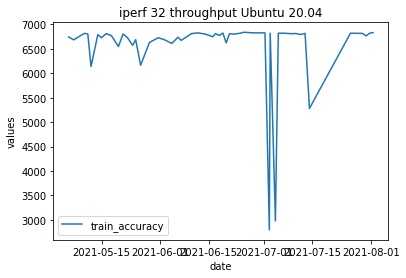

In [58]:
plt.plot(timestamps,iperf_32_values)
# plt.plot(train_history.history['val_accuracy'])
plt.title(f'iperf 32 throughput {g[6]}')
plt.ylabel('values')
plt.legend(['train_accuracy'])
plt.xlabel('date')
# plt.legend(['no_error', '0.1 error rate'], loc='upper left')
plt.show()


In [59]:
str(g)

"('asia-east1-b', 'asia-east2-a', 500000000.0, 'n1-standard-16', 'external', 'cubic', 'Ubuntu 20.04')"

In [60]:
len(group_list)

6033

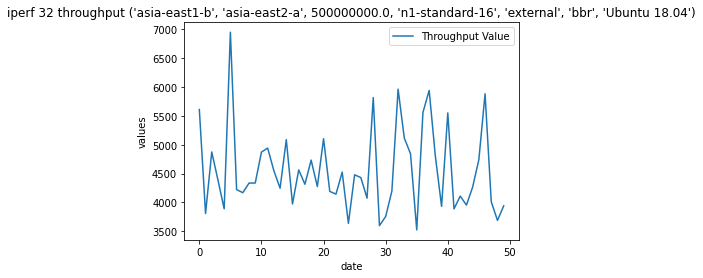

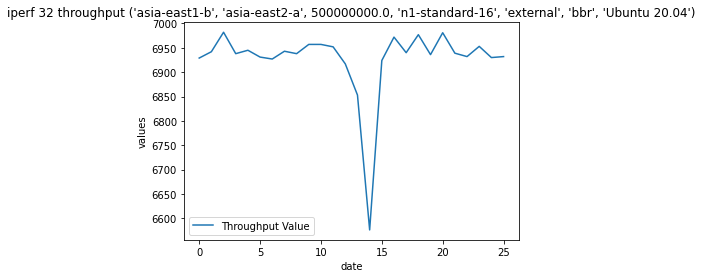

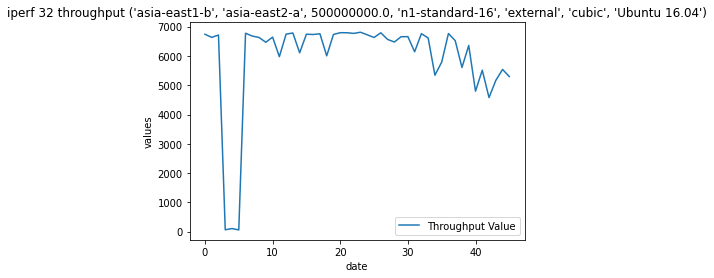

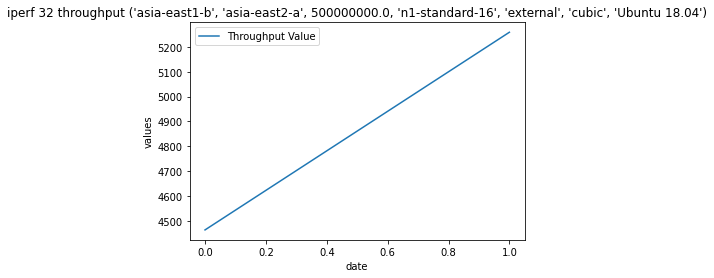

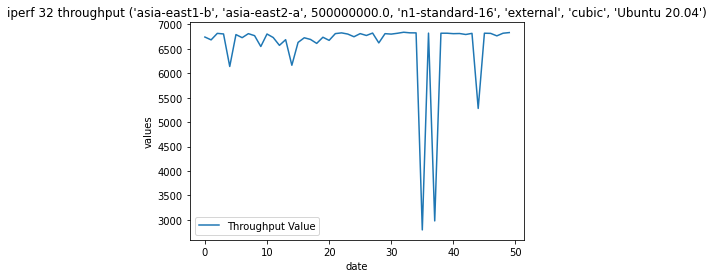

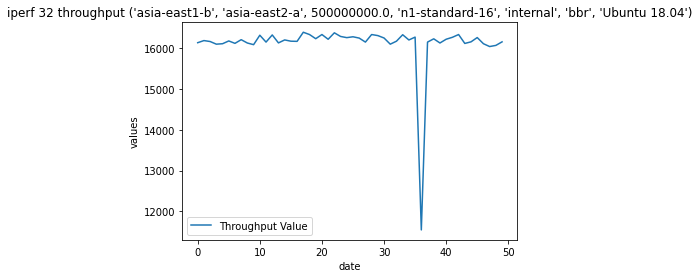

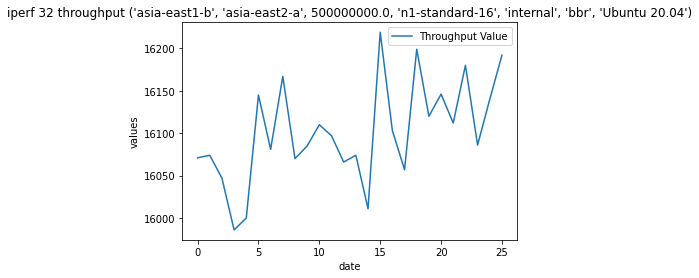

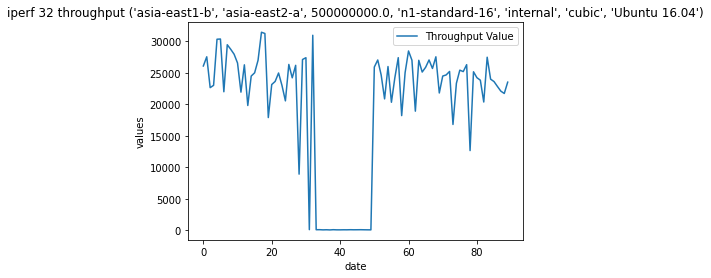

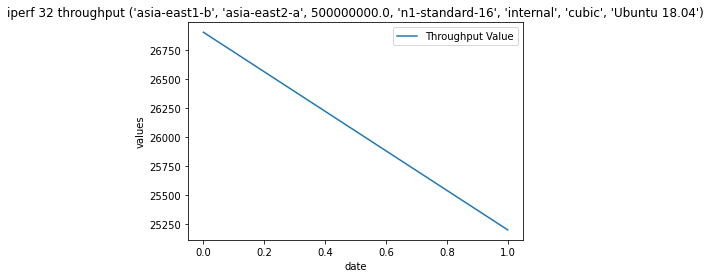

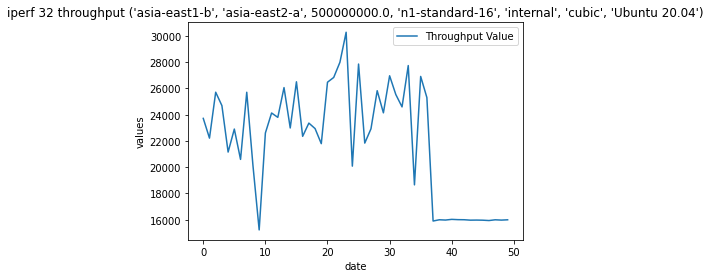

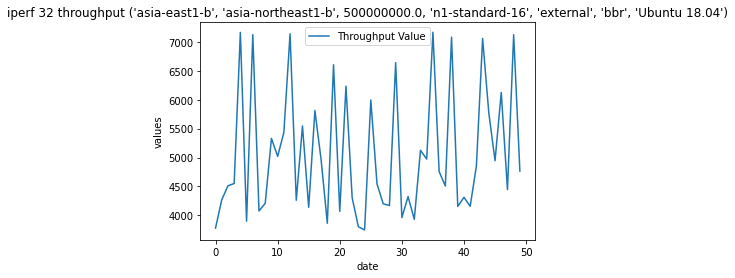

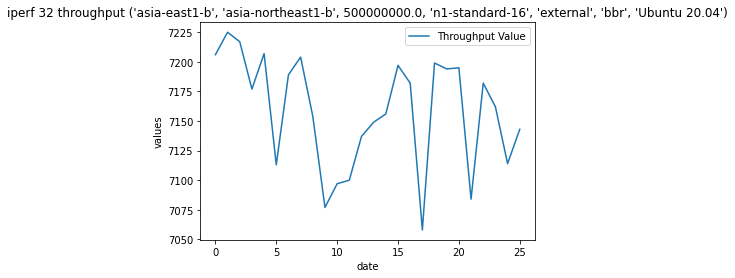

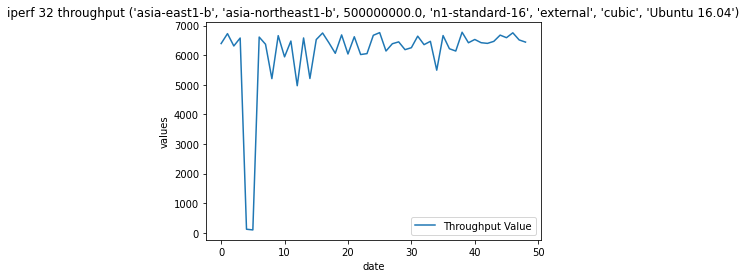

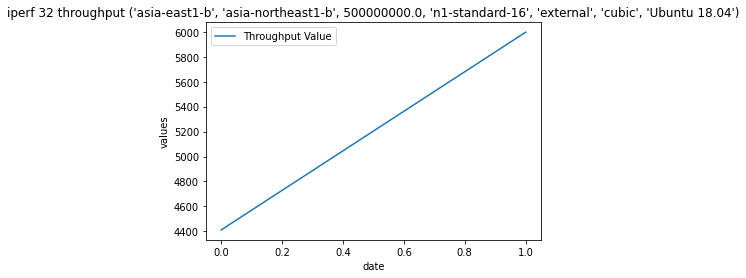

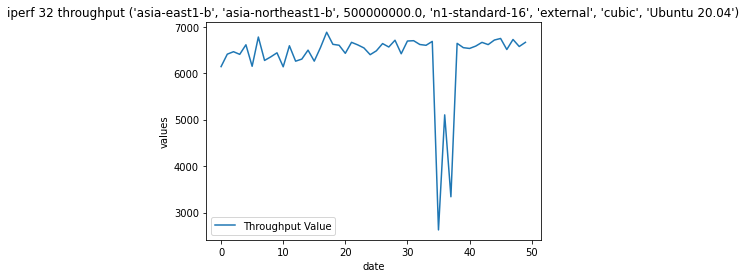

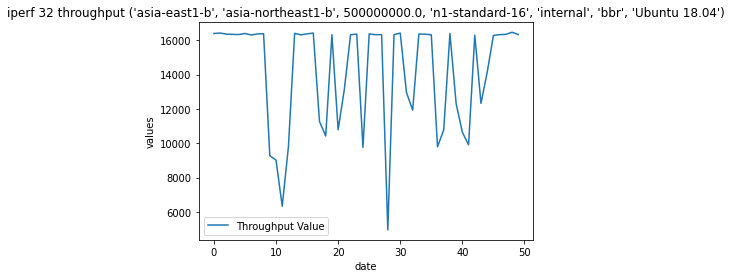

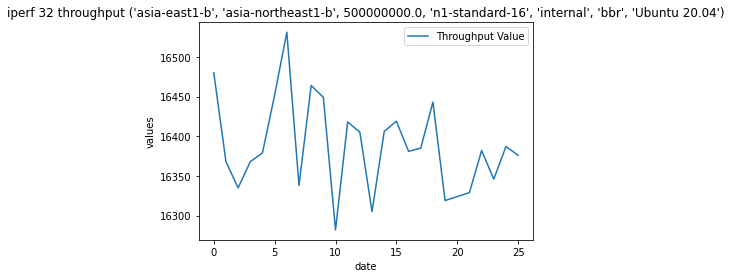

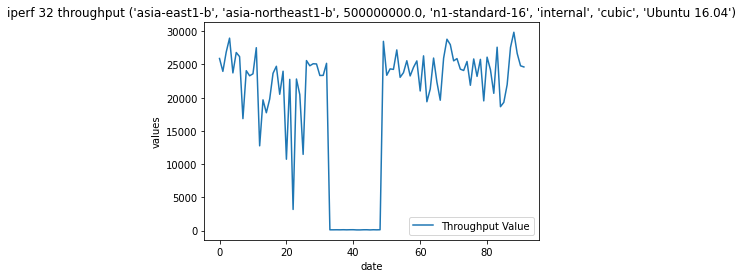

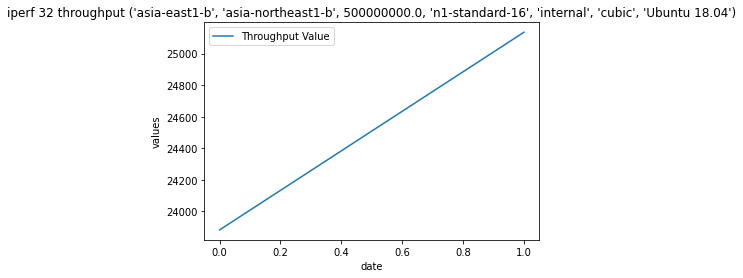

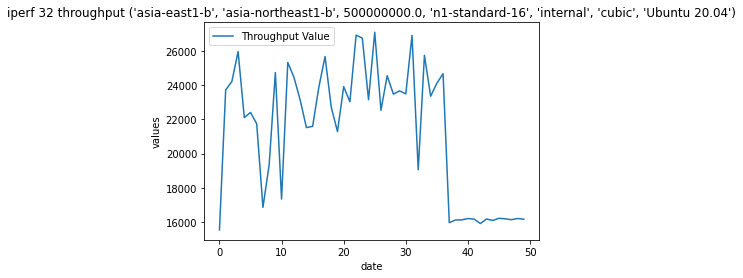

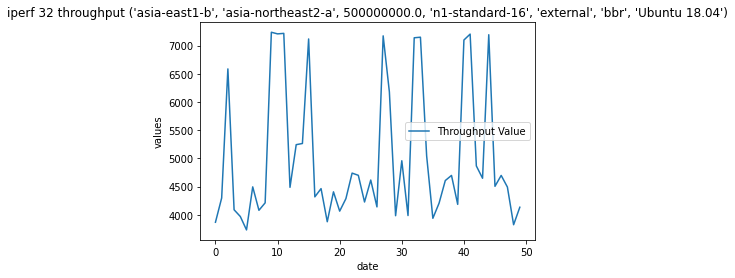

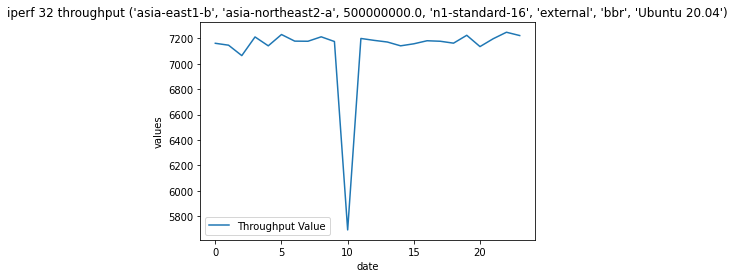

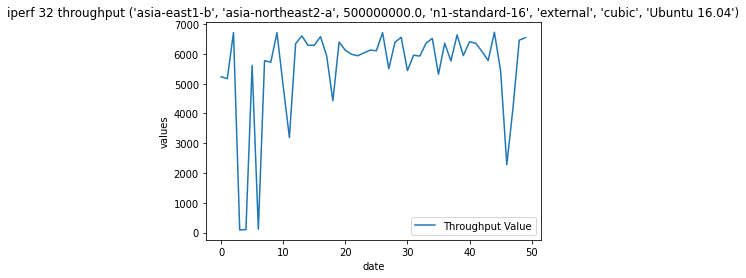

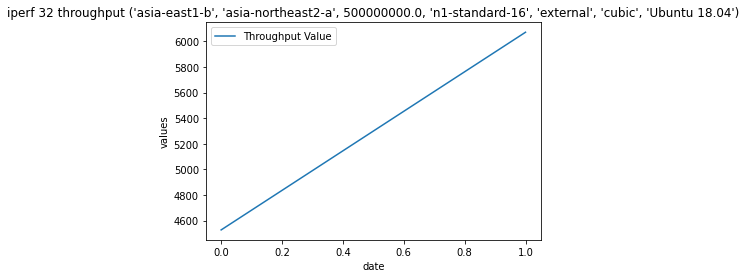

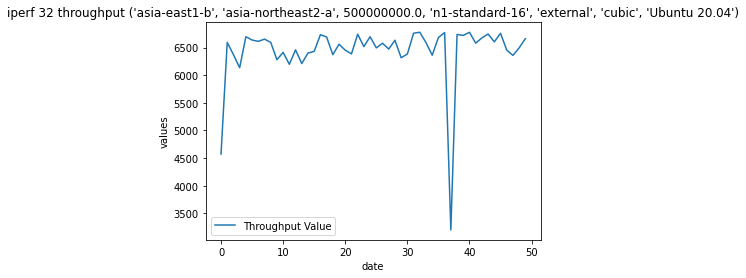

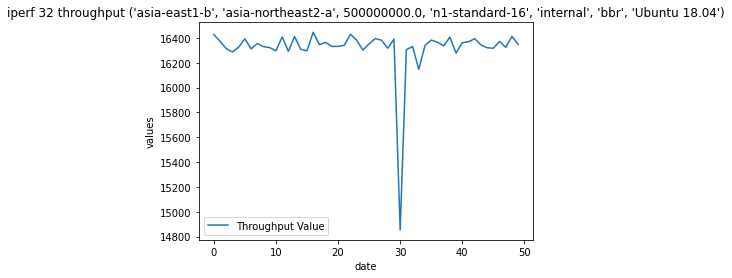

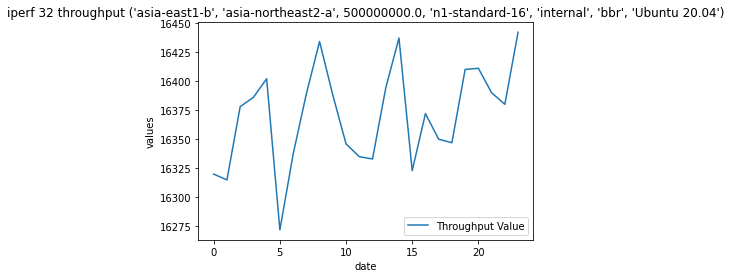

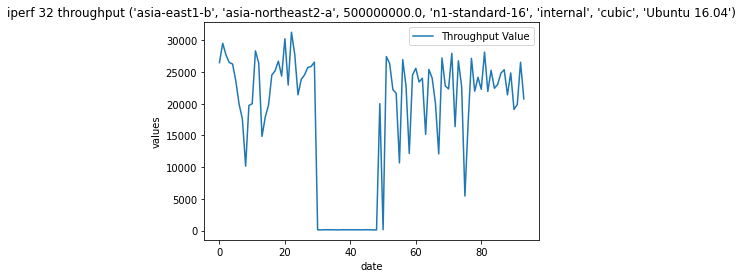

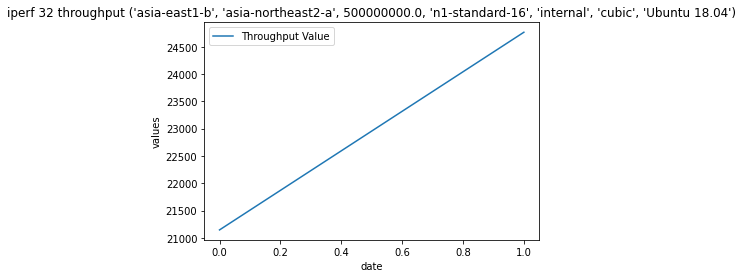

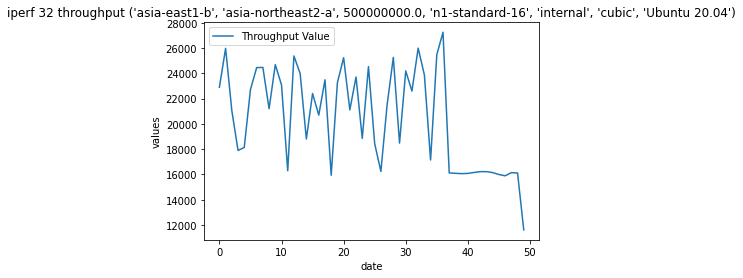

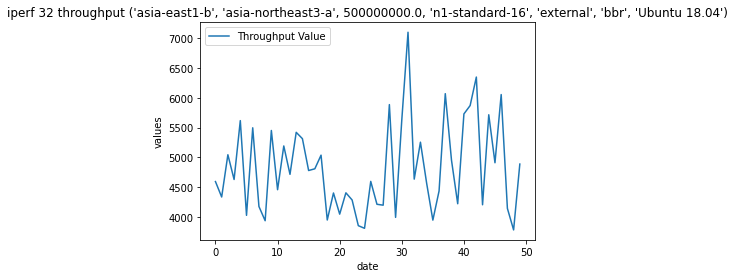

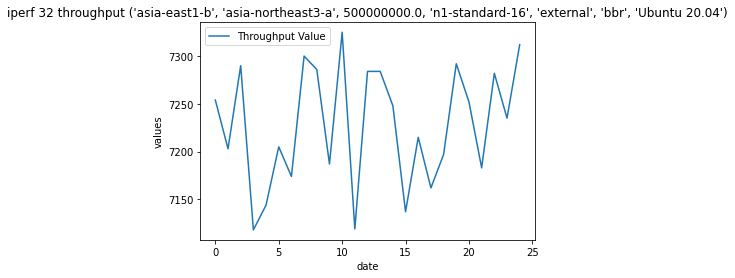

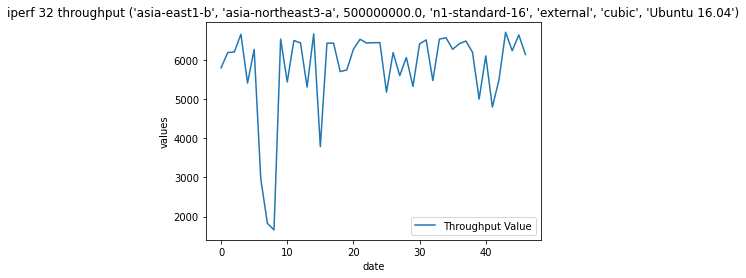

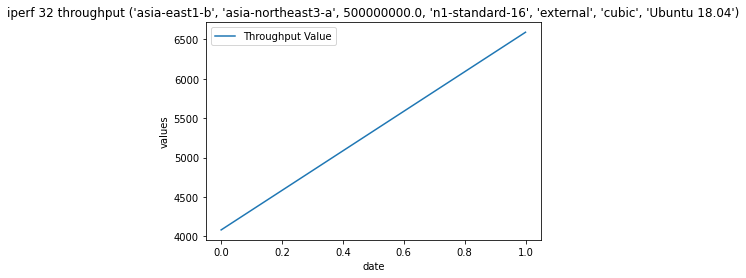

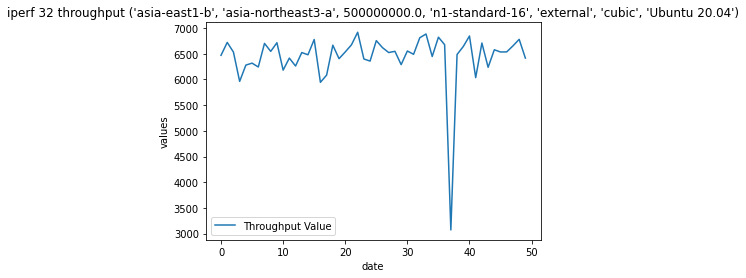

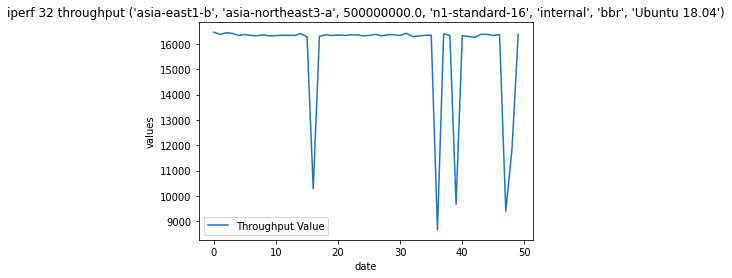

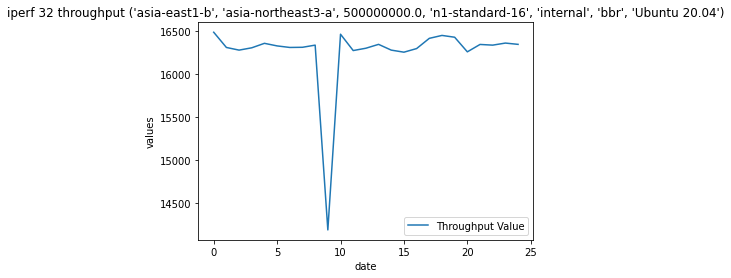

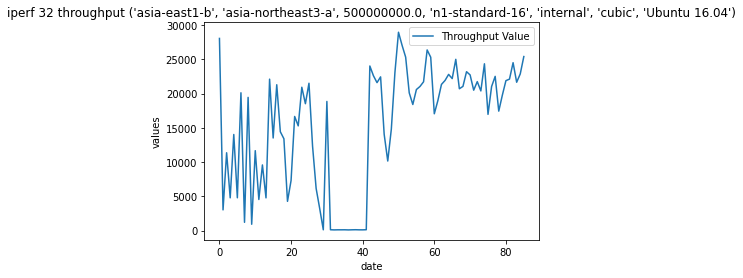

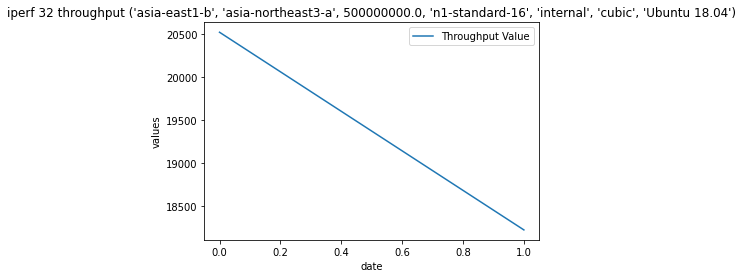

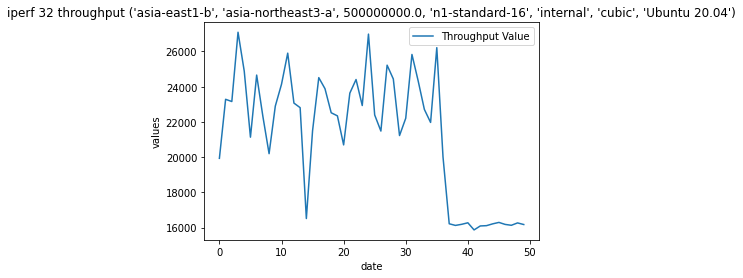

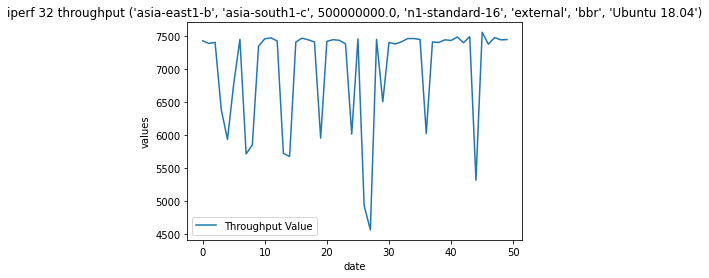

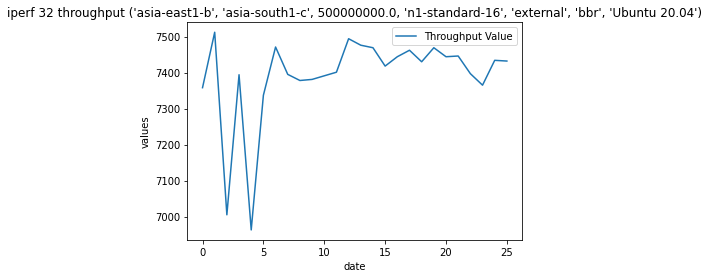

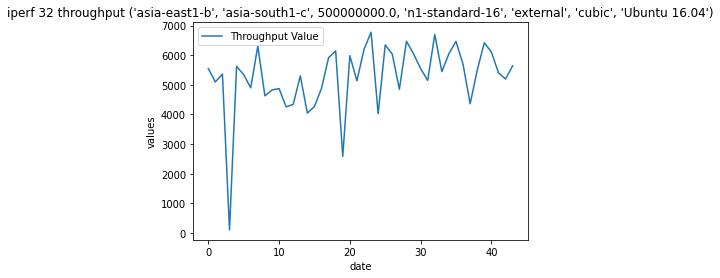

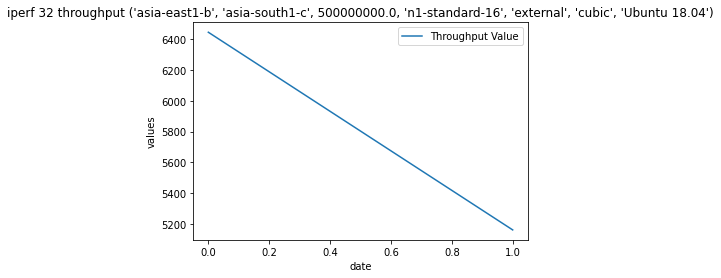

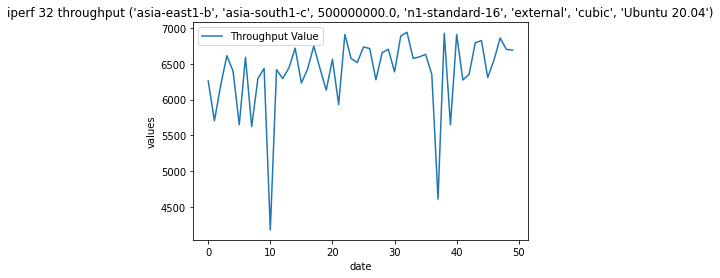

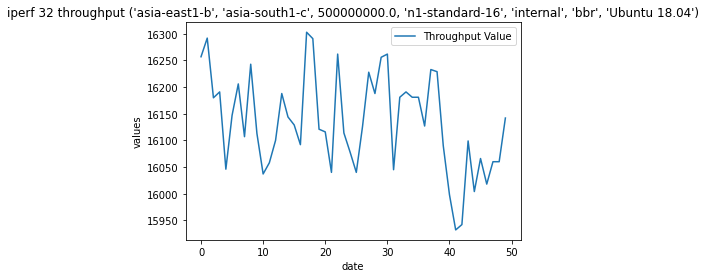

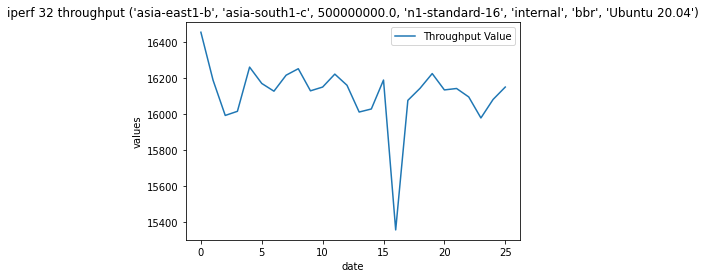

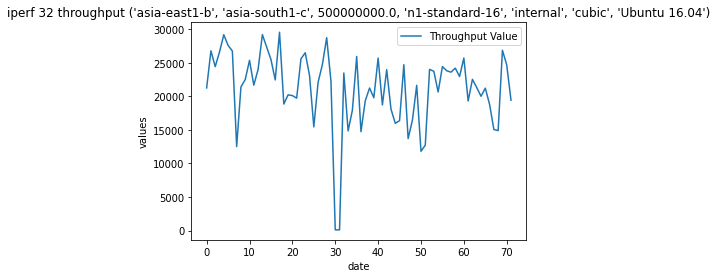

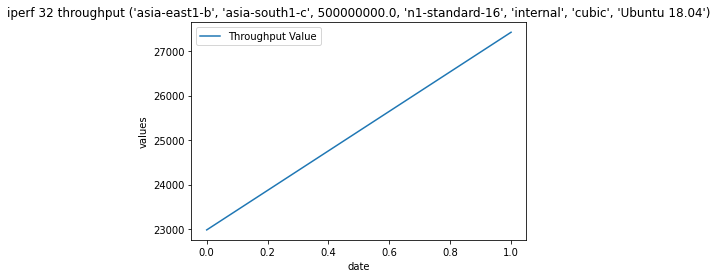

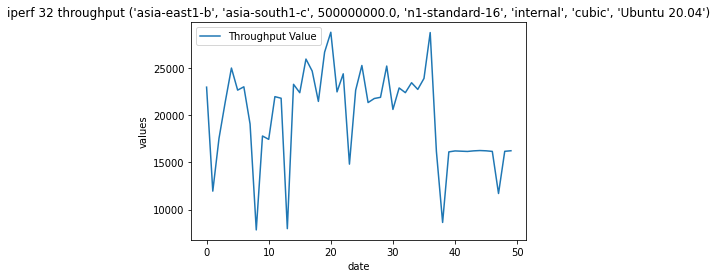

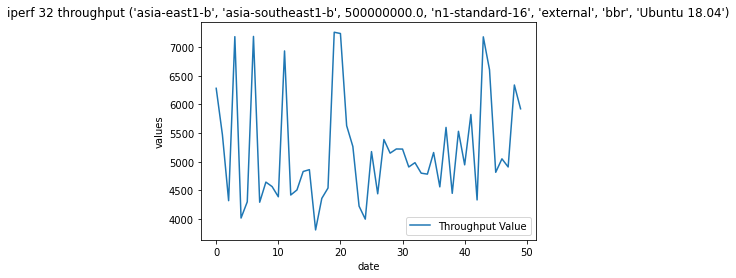

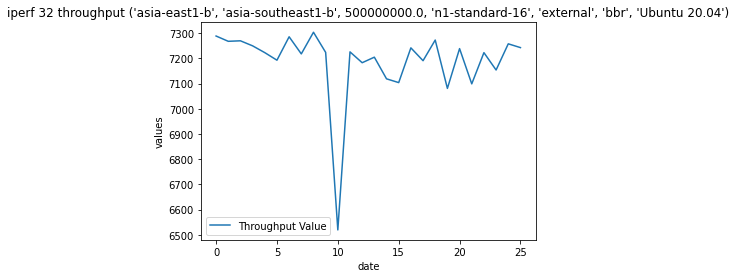

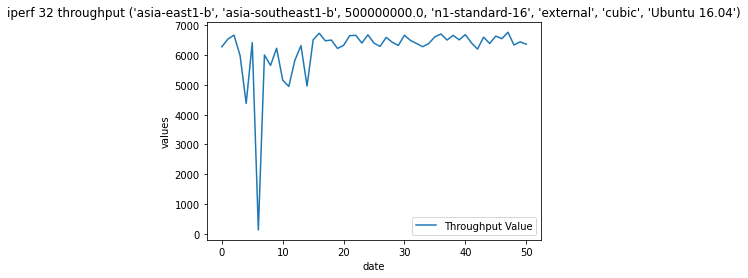

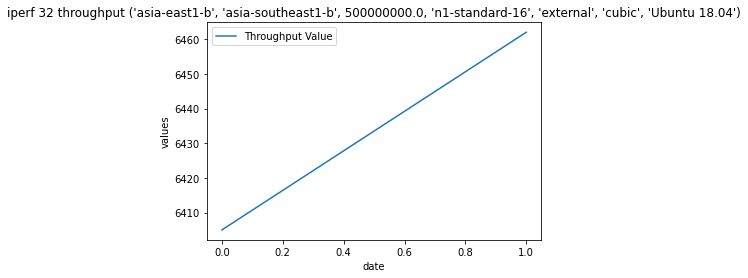

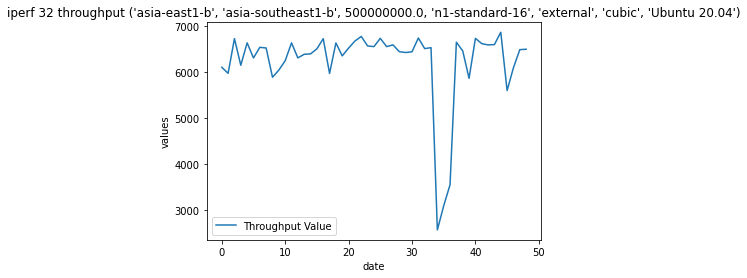

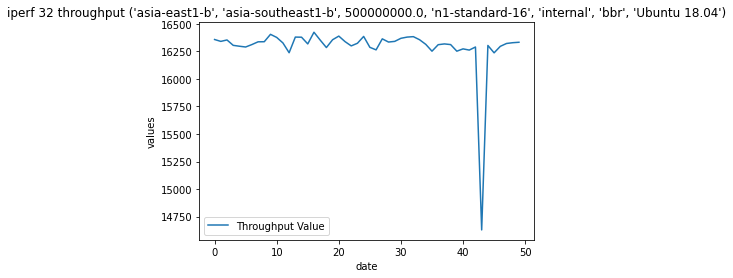

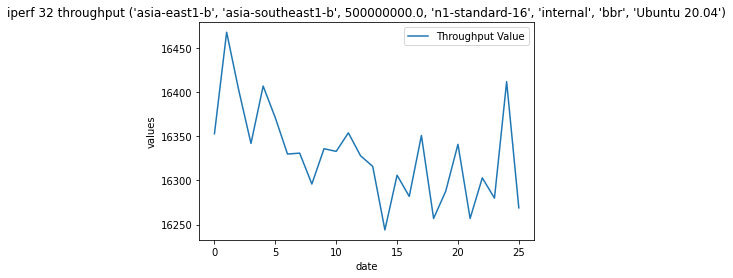

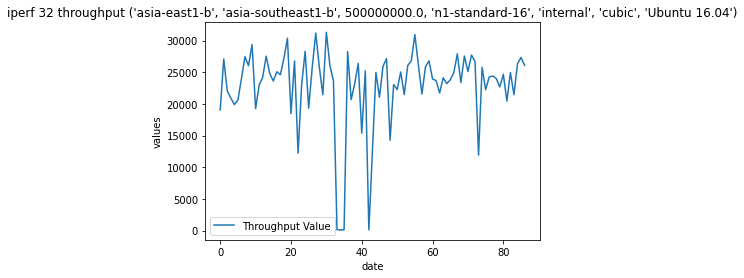

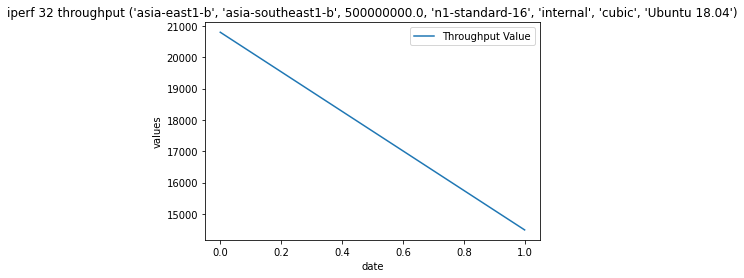

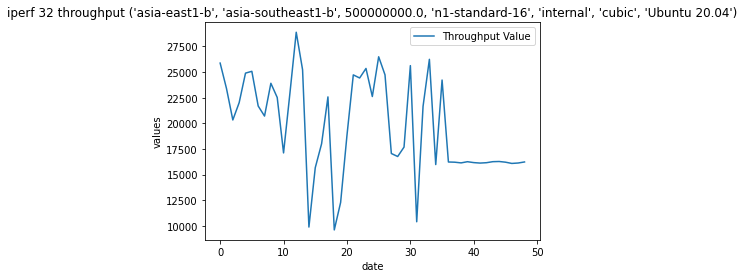

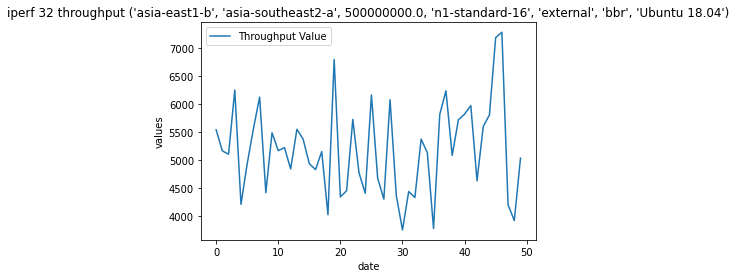

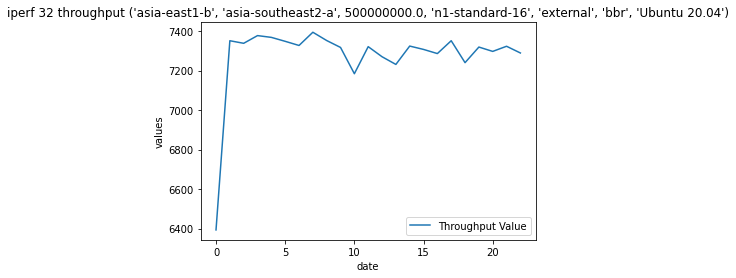

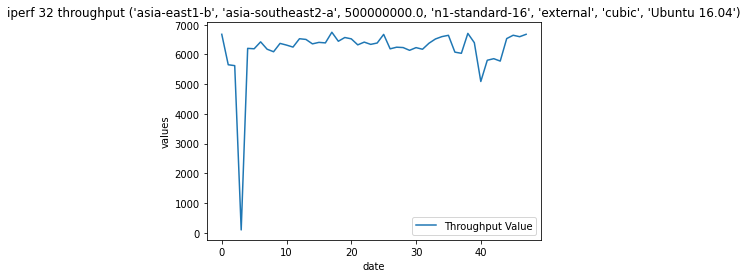

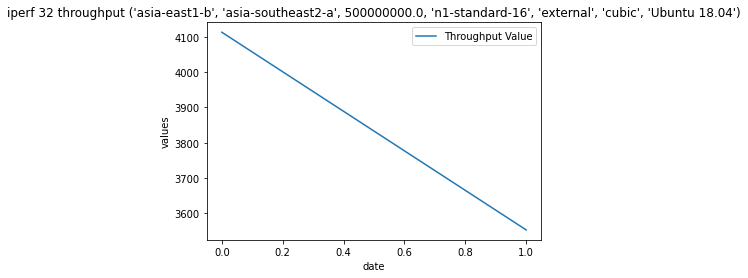

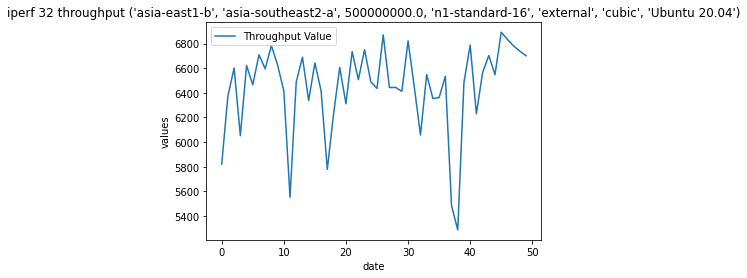

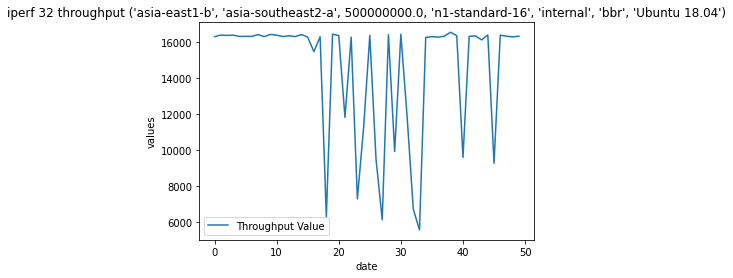

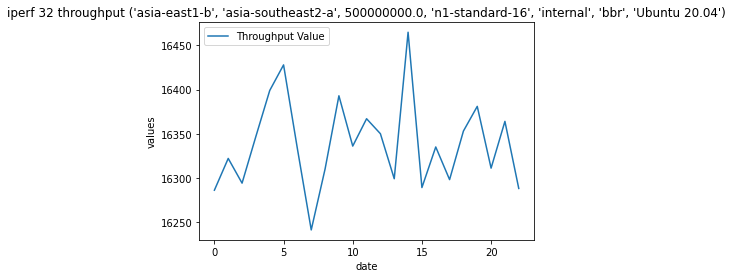

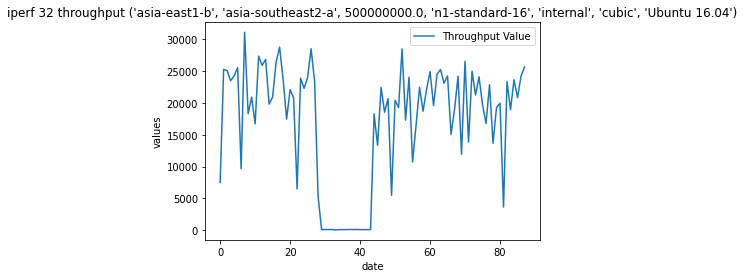

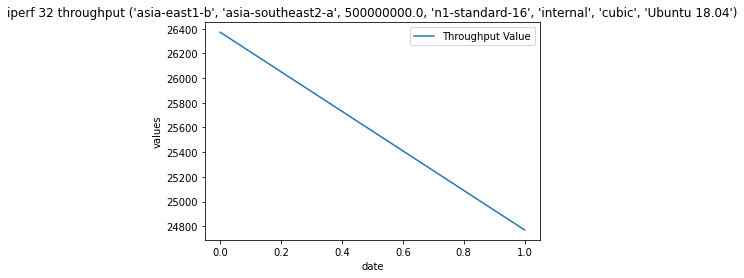

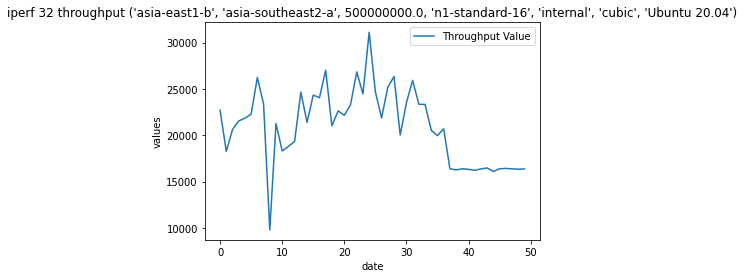

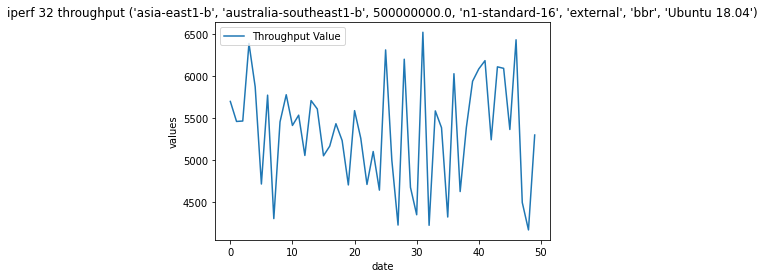

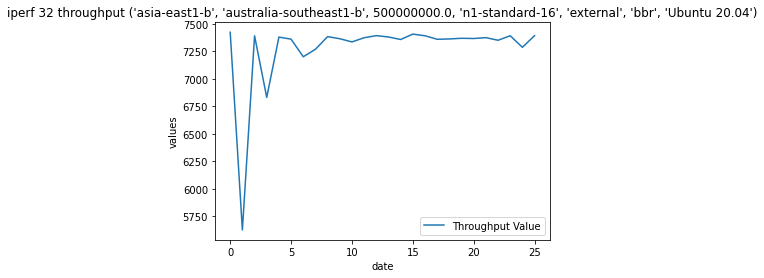

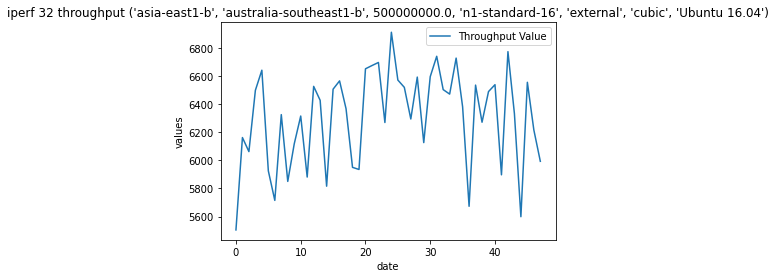

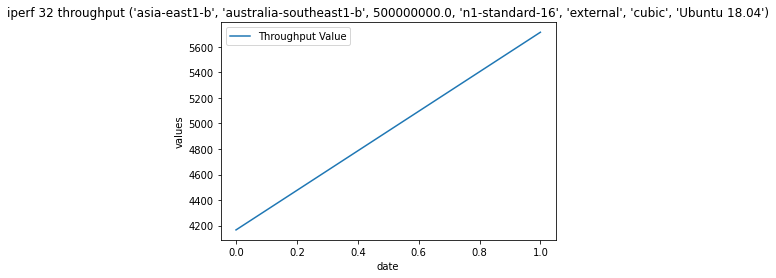

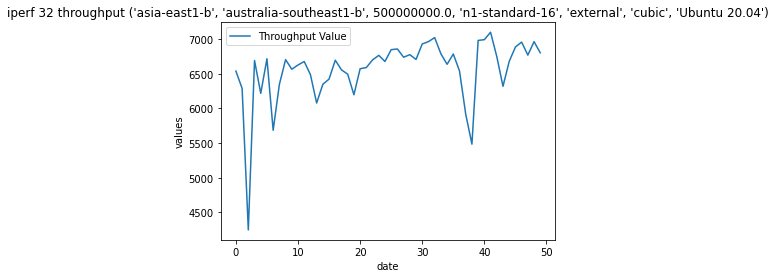

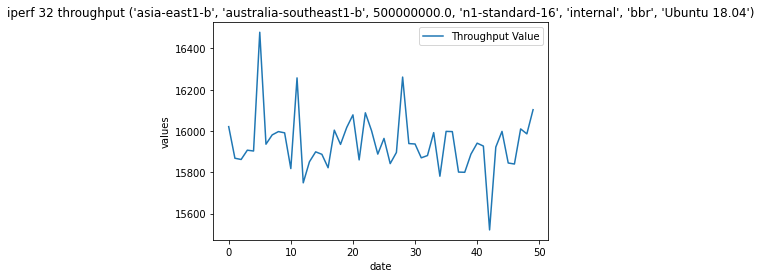

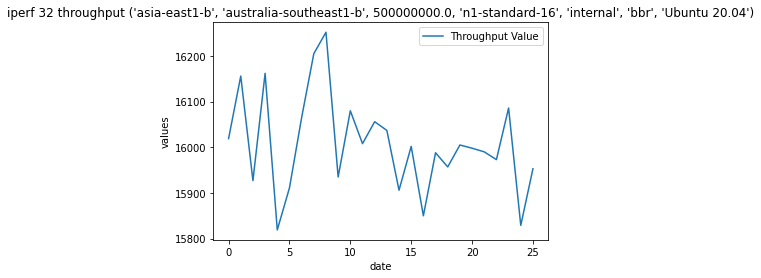

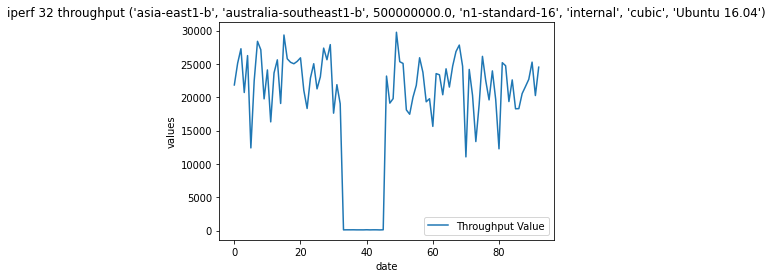

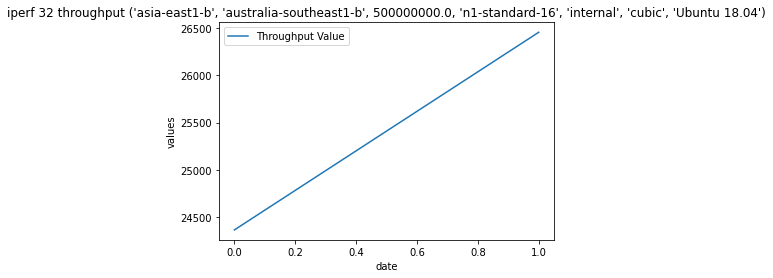

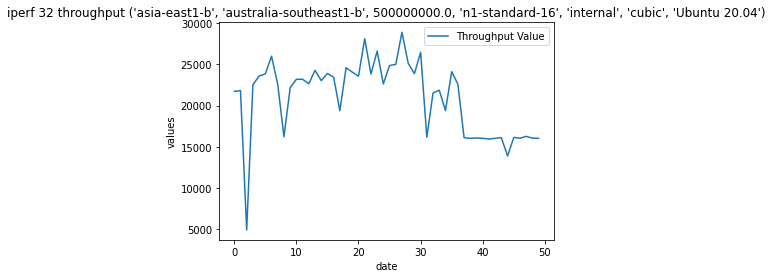

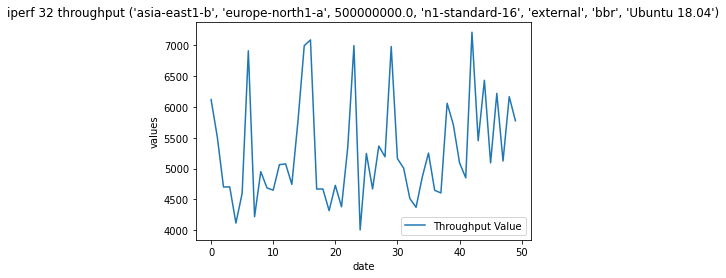

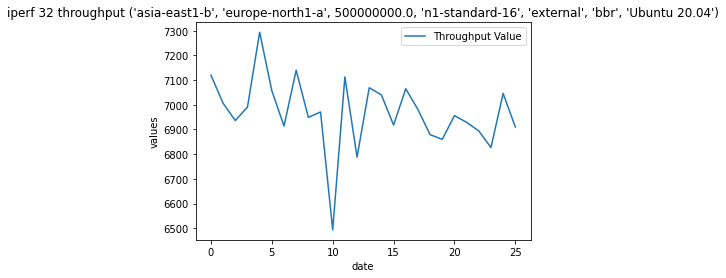

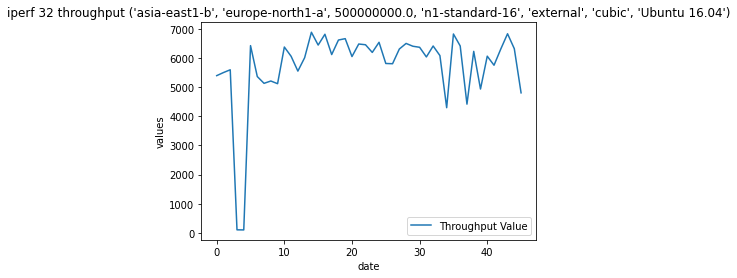

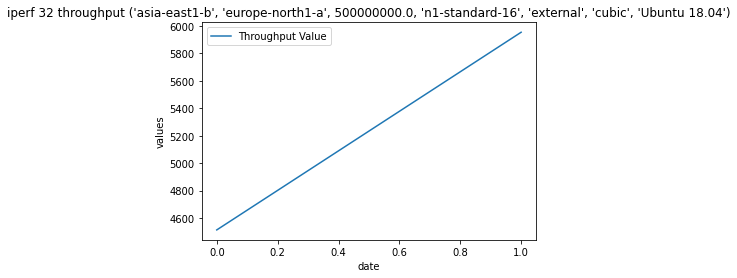

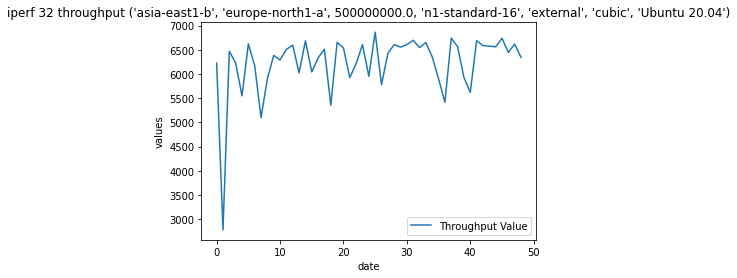

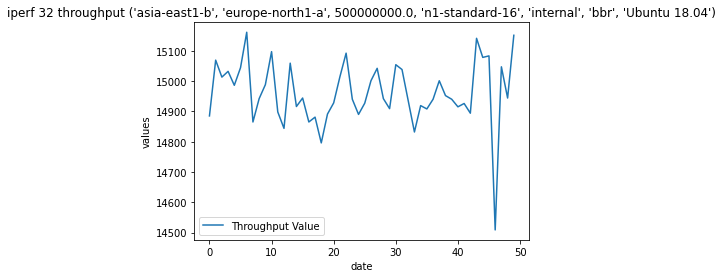

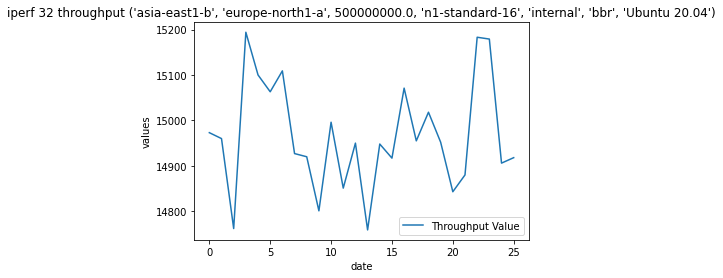

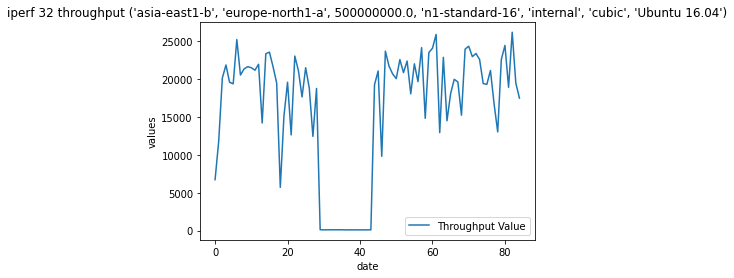

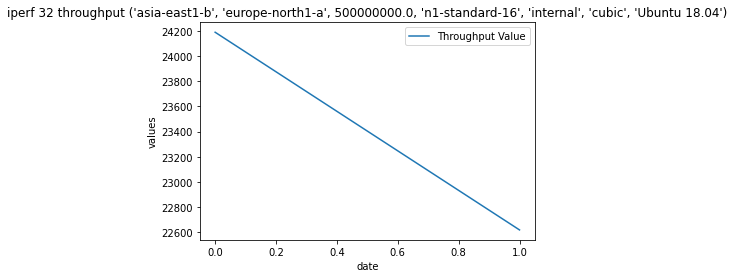

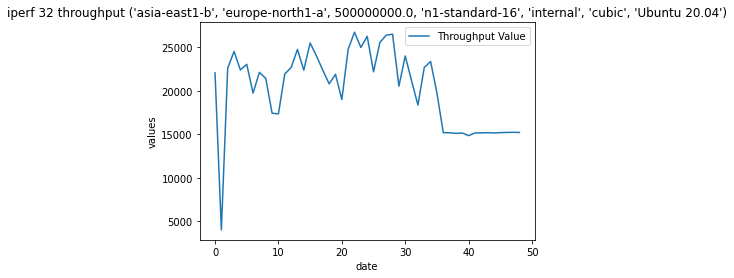

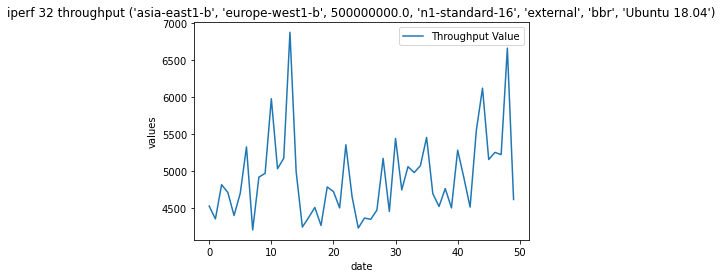

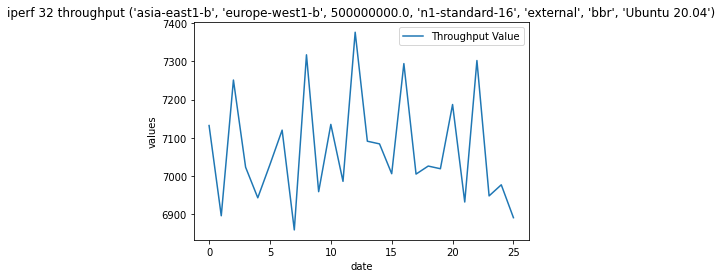

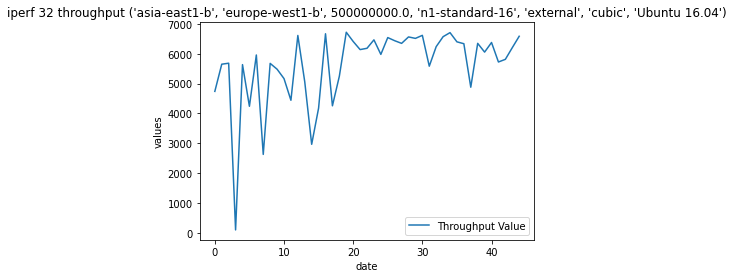

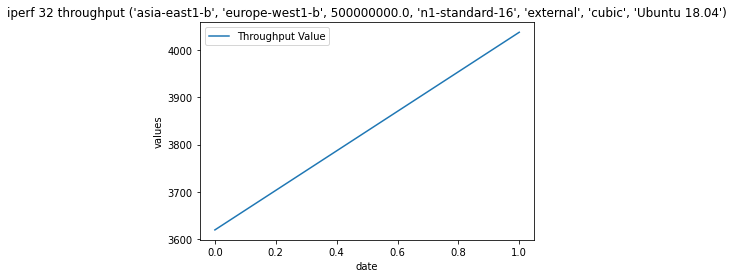

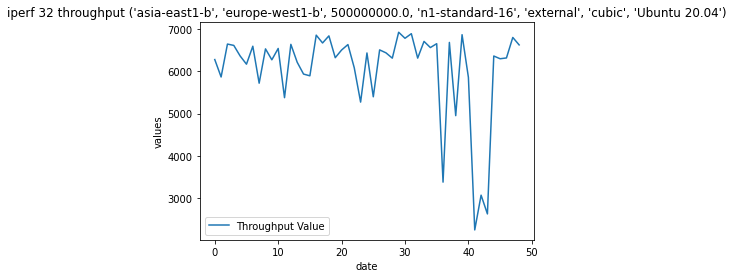

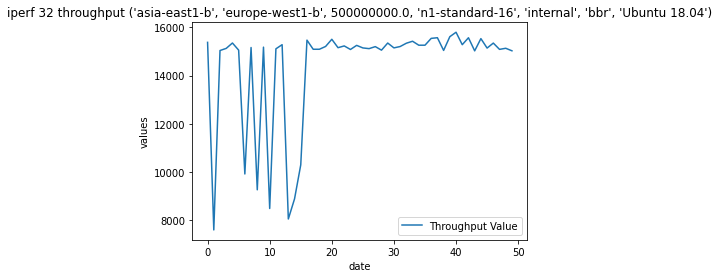

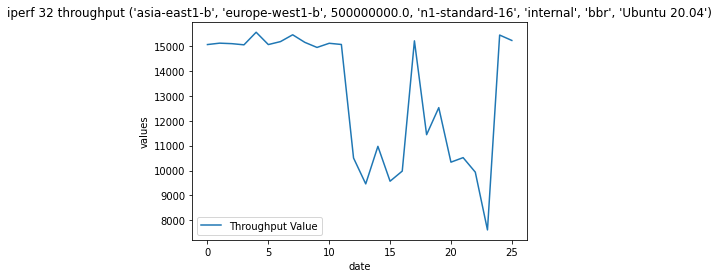

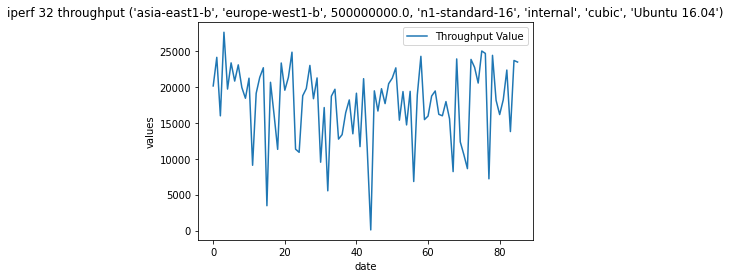

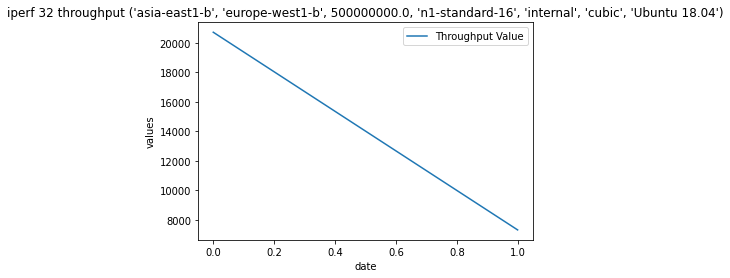

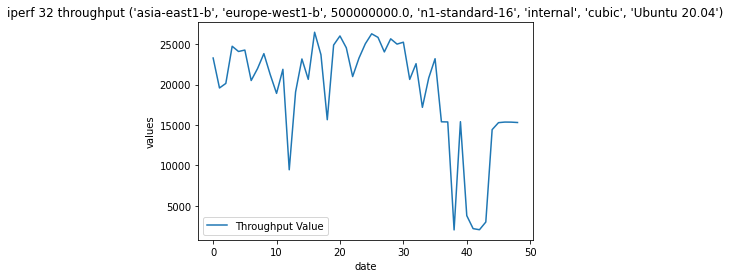

In [61]:
count = 0
for g in group_list:
  count += 1
  if count > 100:
    break
  
  group_values = gb.get_group(g).values.tolist()
  timestamps = []
  iperf_32_values = []
  for value in group_values:
    timestamps.append(value[0])
    iperf_32_values.append(value[2])

  plt.plot(iperf_32_values)
  # plt.plot(train_history.history['val_accuracy'])
  plt.title(f'iperf 32 throughput {str(g)}')
  plt.ylabel('values')
  plt.legend(['Throughput Value'])
  plt.xlabel('date')
  # plt.legend(['no_error', '0.1 error rate'], loc='upper left')
  plt.show()

In [22]:
len(group_values)

50

In [23]:
max_time_delta_sec = 30 * 60 * 60
min_time_delta_sec = 20 * 60 * 60
difference = group_values[1][0] - group_values[0][0]
difference.total_seconds()

124589.407414

In [24]:
max_time_delta_sec 

108000

In [25]:
def min_percent_index(num, percent, offset):
    min_index = round((num-1)*percent) + offset
    if min_index >= num:
        min_index = num-1
    return min_index

def max_percent_index(num, percent, offset):
    max_index = round((num-1)*percent) + offset
    if max_index >= num:
        max_index = num-1
    return max_index

In [26]:
group_list_position = 0
horizon = 0
window = 5
step = 1
# Max time delta = 30 hours
max_time_delta_sec = 30 * 60 * 60
current_group = group_list[group_list_position]
min_index = 0
max_index = 69
max_index = max_index - horizon
i = min_index + window

sample_list = []
target_list = []

rows = np.arange(i, max_index+1)
  # print("i: ", i)
  # print("max index: ", max_index)
  # print(rows)

for j,row in enumerate(rows):
  low_index = rows[j] - window
  high_index = rows[j]
  sample = group_values[low_index:high_index:step]
  target = group_values[rows[j] + horizon]
  
  # Check dates of sample to make sure there are no gaps
  bad_sample = False
  for sample_index in range(1, len(sample)):
    difference = sample[sample_index][0] - sample[sample_index-1][0]
    delta_in_seconds = difference.total_seconds()
    if delta_in_seconds > max_time_delta_sec:
      bad_sample = True
  
  if bad_sample:
    continue
    

  # print("j: ", rows[j])
  # print(sample)
  # print(target)
  sample_list.append(sample)
  target_list.append(target)

IndexError: list index out of range

In [ ]:
len(sample_list)

In [ ]:
sample_list[0]

In [ ]:
import pandas_data_util

In [ ]:
filename = 'data/bq-results-20211029-114839-fy49t32j30hp.csv'
train_percent=0.6
valid_percent=0.2
normalize=0
Data = pandas_data_util.DataUtil(filename,
                train_percent,
                valid_percent,
                horizon,
                window,
                normalize)

In [ ]:
Data.train[0][2]

In [ ]:
Data.train[1][0]

In [ ]:
len(Data.train[0])

In [ ]:
len(Data.test[0])

In [ ]:
len(Data.valid[0])